**Análise de desempenho do modelo Keras**
---



---



Nesta lição, aprenderemos a usar o modelo MNIST que treinamos na lição anterior e analisaremos seu desempenho:
1. Carregar o modelo e os dados do Keras
2. Visualizar as imagens que classificamos erroneamente
3. Criar uma matriz de confusão
4. Criar relatório de classificação

In [1]:
from tensorflow.keras.models import load_model

model = load_model('mnist_simple_cnn_25_Epochs.h5')

2025-04-22 04:06:01.526154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745305561.670094    5485 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745305561.708704    5485 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745305562.068549    5485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745305562.068569    5485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745305562.068570    5485 computation_placer.cc:177] computation placer alr

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# **Visualização de nossas classificações incorretas**
#### **Primeiro, vamos obter nossas previsões de teste**

In [3]:
import numpy as np


print(x_test.shape)
x_test = x_test.reshape(10000,28,28,1) 
print(x_test.shape)


print("Predição de classes para todas as 10,000 test images...")
pred = np.argmax(model.predict(x_test), axis=-1)
print("Completed.\n")

(10000, 28, 28)
(10000, 28, 28, 1)
Predição de classes para todas as 10,000 test images...


I0000 00:00:1745305572.702760    5579 service.cc:152] XLA service 0x7f3598004680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745305572.702786    5579 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-22 04:06:12.737309: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745305572.800685    5579 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-22 04:06:13.190577: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 4 bytes spill stores, 4 bytes spill loads



159/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step

I0000 00:00:1745305574.082914    5579 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Completed.



In [4]:
import cv2
import numpy as np

# Use o numpy para criar uma matriz que armazene um valor de 1 quando ocorrer uma classificação incorreta
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)


print(f"Indices da classificação incorreta: \n{misclassified_indices}")
print(f"Pontuações incorretas: {len(misclassified_indices[0])}")

Indices da classificação incorreta: 
(array([   8,   62,   92,  124,  149,  233,  241,  247,  259,  290,  300,
        313,  318,  320,  321,  340,  352,  358,  359,  362,  381,  412,
        444,  445,  448,  478,  479,  495,  502,  507,  511,  530,  531,
        551,  565,  578,  591,  613,  619,  628,  629,  658,  659,  684,
        689,  691,  707,  717,  720,  740,  791,  795,  810,  844,  898,
        924,  939,  947,  950,  951,  965,  990, 1003, 1014, 1032, 1039,
       1044, 1062, 1068, 1073, 1096, 1107, 1112, 1114, 1131, 1173, 1181,
       1192, 1194, 1198, 1204, 1206, 1226, 1232, 1242, 1247, 1251, 1253,
       1260, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1378, 1393,
       1429, 1444, 1469, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1569,
       1581, 1609, 1621, 1634, 1640, 1671, 1681, 1709, 1717, 1718, 1754,
       1772, 1790, 1800, 1828, 1850, 1857, 1878, 1883, 1901, 1911, 1917,
       1930, 1940, 1952, 1970, 1981, 1984, 2001, 2016, 2024, 2035, 2040,
       2043, 

**Visualizando as imagens que nosso modelo classificou erroneamente**

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title="", image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


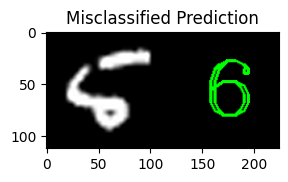

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


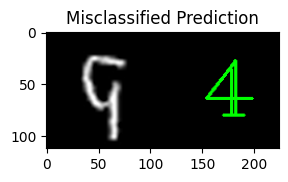

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


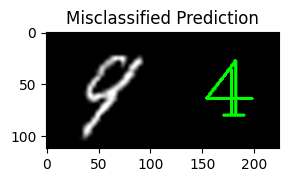

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


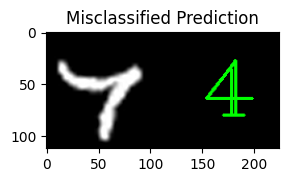

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


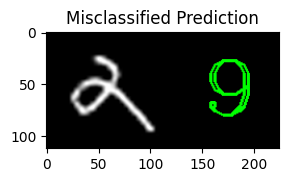

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


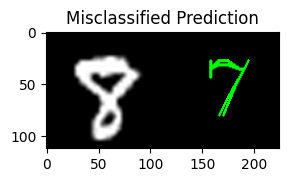

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


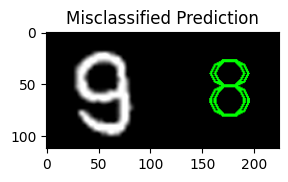

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


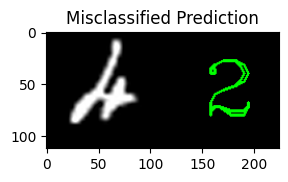

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


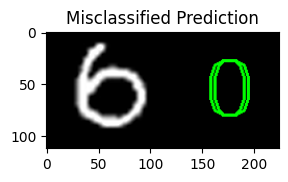

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


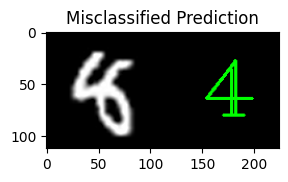

In [6]:
import cv2
import numpy as np

# Recarregar nossos dados, já que os redimensionamos
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    '''Função que coloca a classe prevista ao lado da imagem original'''
    
    BLACK = [0,0,0]
    
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    #Obtenha uma imagem de dados aleatórios do nosso conjunto de dados de teste 
    input_im = x_test[misclassified_indices[0][i]]
    # Crie uma imagem maior e redimensionada para conter nosso texto e permitir uma exibição maior
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    
    input_im = input_im.reshape(1,28,28,1) 
    
    # Obtenha a previsão, use [0] para acessar o valor na matriz numpy, pois ela está armazenada como uma matriz
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])

    # Coloque o rótulo na imagem de nossa amostra de dados de teste
    draw_test("Misclassified Prediction", res,  np.uint8(imageL)) 

### **A more elagent way to plot this**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


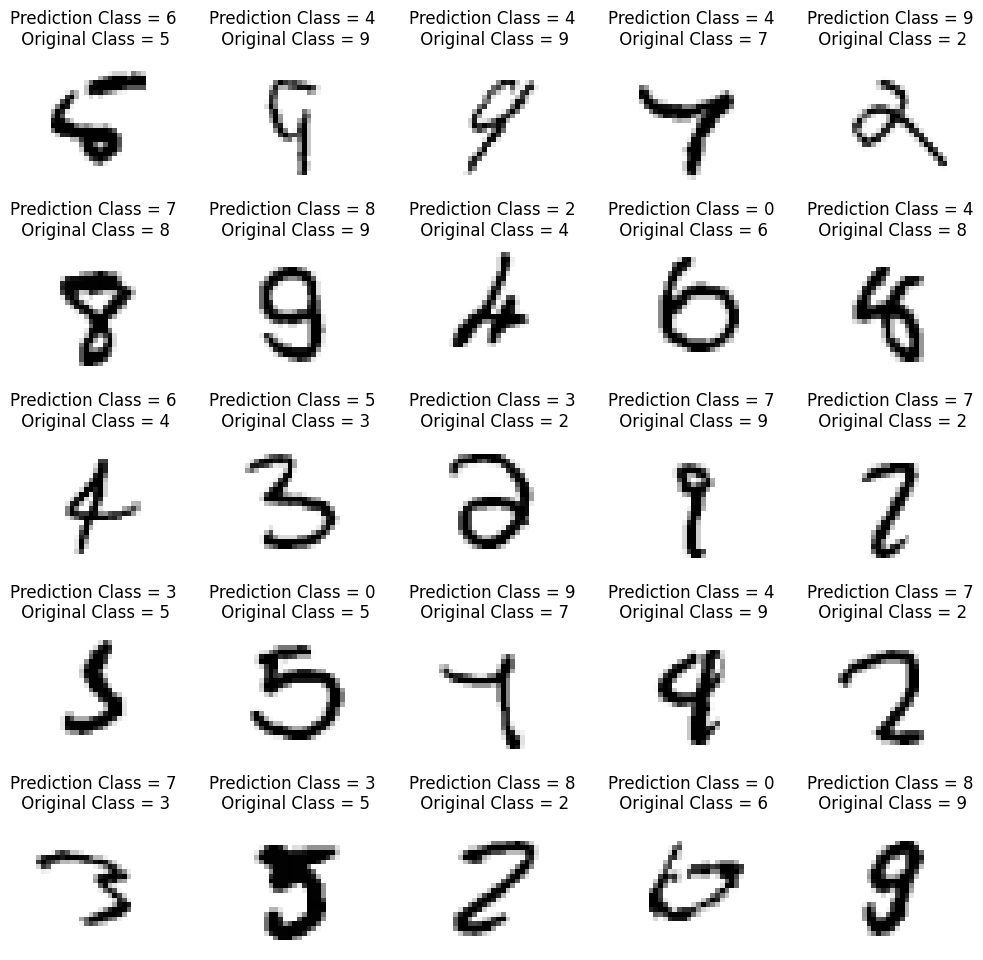

In [7]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    input_im = x_test[misclassified_indices[0][i]]
    ind = misclassified_indices[0][i]
    predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
    axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# **Criando nossa Matriz de Confusão**

Usamos a ferramenta Confusion Matrix da Sklean para criá-la. Tudo o que precisamos é de:
1. Os rótulos verdadeiros
2. Os rótulos previstos

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np

x_test = x_test.reshape(10000,28,28,1) 
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
[[ 965    0    1    2    0    2    6    1    3    0]
 [   0 1121    2    1    0    1    3    1    6    0]
 [  10    1  962   12    8    0   12    8   17    2]
 [   3    2    4  962    3    5    2    7   14    8]
 [   1    0    5    0  946    0    7    2    6   15]
 [  11    5    1   28    9  793   15    2   21    7]
 [   9    4    3    1    8    7  922    1    3    0]
 [   3    8   17    7    9    0    0  955    4   25]
 [   5    1    1    8    9    5    9    8  923    5]
 [   8    6    1   11   40    0    1   10    9  923]]


#### **Interpretando a Matriz de Confusão**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2010.46.45.png)
### **Criando um gráfico mais apresentável**

Vamos reutilizar essa função muito bem feita da documentação do sklearn para plotar uma matriz de confusão usando gradientes de cores e rótulos.

In [9]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

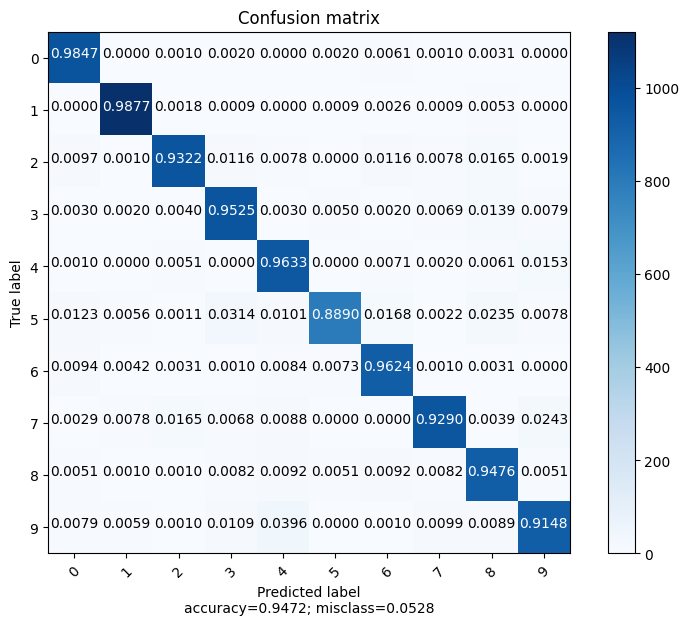

In [10]:
target_names = list(range(0,10))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, target_names)

## **Vamos dar uma olhada em nossa precisão por classe**

In [15]:
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1) #Diagonal principal multiplicado x 100 / Numero total de dados de teste

for (i,ca) in enumerate(class_accuracy):
    print(f'Acurácia para a classe {i} : {ca:.3f}%')

Acurácia para a classe 0 : 98.469%
Acurácia para a classe 1 : 98.767%
Acurácia para a classe 2 : 93.217%
Acurácia para a classe 3 : 95.248%
Acurácia para a classe 4 : 96.334%
Acurácia para a classe 5 : 88.901%
Acurácia para a classe 6 : 96.242%
Acurácia para a classe 7 : 92.899%
Acurácia para a classe 8 : 94.764%
Acurácia para a classe 9 : 91.477%


# **Agora vamos dar uma olhada no Relatório de Classificação**

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.92      0.96      0.94       982
           5       0.98      0.89      0.93       892
           6       0.94      0.96      0.95       958
           7       0.96      0.93      0.94      1028
           8       0.92      0.95      0.93       974
           9       0.94      0.91      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### **Suporte é a soma total dessa classe no conjunto de dados**

### **Revisão do Recall**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2011.11.12.png)

### **Revisão da precisão**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2011.11.22.png)

### **Alto recall (ou sensibilidade) com baixa precisão.**
Isso nos diz que a maioria dos exemplos positivos é reconhecida corretamente (baixos falsos negativos), mas há muitos falsos positivos, ou seja, outras classes sendo previstas como a nossa classe em questão. 

### **Baixo recall (ou sensibilidade) com alta precisão.**

Nosso classificador está perdendo muitos exemplos positivos (FN alto), mas os que previmos como positivos são de fato positivos (baixos falsos positivos)